Librerias 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import _tree, plot_tree, DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

Analisis de dataset

In [48]:
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/trees/decision_tree/titanic.csv")

print()
# Informacion general del dataset
print(df.info())
print()
# Informacion estadistica del dataset
print(df.describe())
print()
# Verificar si existen valores nulos o na
print(df.isna().sum())
print()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min   

In [49]:
# Descarte de columnas innecesarias y cambio de nombre de otras
df.drop(["Name", "Fare"], axis=1, inplace=True)
df.rename({"Siblings/Spouses Aboard":"siblings", "Parents/Children Aboard":"parents"}, axis=1, inplace=True)

Preprocesamiento

In [50]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True, dtype=int)
print()
print(df.head())


   Survived  Pclass   Age  siblings  parents  Sex_male
0         0       3  22.0         1        0         1
1         1       1  38.0         1        0         0
2         1       3  26.0         0        0         0
3         1       1  35.0         1        0         0
4         0       3  35.0         0        0         1


Entrenamiento del arbol de decision

In [51]:
x = df.drop(["Survived"], axis=1)
y = df.Survived
# Separacion de datos de entrenamiento y de datos de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Creacion del modelo de decision
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
# Entrenamiento
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Evaluacion del modelo

In [52]:
# Metrica de accuracy
pred_train = tree.predict(x_train)
pred_test = tree.predict(x_test)
train_accu = accuracy_score(y_train, pred_train)
test_accu = accuracy_score(y_test, pred_test)
print(f"El accuracy de entrenamiento es: {train_accu}\nEl accuracy de testeo es: {test_accu}")

El accuracy de entrenamiento es: 0.8011283497884344
El accuracy de testeo es: 0.7247191011235955


/tmp/ipykernel_218/1631283190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna, y=importances, palette="bright", edgecolor="black", linewidth=2)


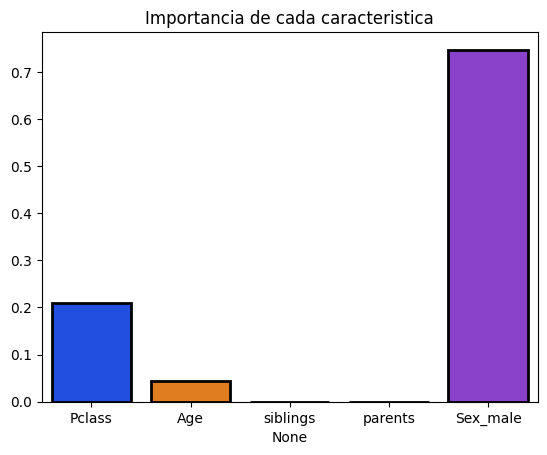

In [53]:
# Visualizacion decaracteristicas importantes
importances = tree.feature_importances_
columna = x.columns
sns.barplot(x=columna, y=importances, palette="bright", edgecolor="black", linewidth=2)
plt.title("Importancia de cada caracteristica")
plt.show()

In [54]:
# Las variables Siblings/Spouses Aboard y Parents/Children Aboard dado el grafico se consideran irrelevantes para el modelo
x = df.drop(["Survived", "siblings", "parents"], axis=1)
y = df.Survived
# Separacion de datos de entrenamiento y de datos de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Creacion del modelo de decision
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
# Entrenamiento
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [55]:
# Metrica de accuracy
pred_train = tree.predict(x_train)
pred_test = tree.predict(x_test)
train_accu = accuracy_score(y_train, pred_train)
test_accu = accuracy_score(y_test, pred_test)
print(f"El accuracy de entrenamiento es: {train_accu}\nEl accuracy de testeo es: {test_accu}")

El accuracy de entrenamiento es: 0.8011283497884344
El accuracy de testeo es: 0.7247191011235955
